In [17]:
import pandas as pd
import os
from matplotlib.colors import LinearSegmentedColormap
from mplsoccer import VerticalPitch, Pitch
from highlight_text import ax_text, fig_text
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from joblib import Parallel, delayed
from tqdm import tqdm

In [2]:
import pandas as pd
folder = 'Data'
archivo = 'WhoScoredNumMatches15Spatial12x8.csv'

path = os.path.join(folder, archivo)

m1 = pd.read_csv(path, skiprows = 1, header=None)

In [3]:
m1.columns

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            4989, 4990, 4991, 4992, 4993, 4994, 4995, 4996, 4997, 4998],
           dtype='int64', length=4999)

In [4]:
m1.tail()

,0,1,2,3,4,5,6,7,8,9,...,4989,4990,4991,4992,4993,4994,4995,4996,4997,4998
105815,6,Amari'i Bell,Luton,2024-02-21,1,15,1729340,2.0,3.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105816,7,Tahith Chong,Luton,2024-02-21,1,15,1729340,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105817,8,Cauley Woodrow,Luton,2024-02-21,1,15,1729340,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105818,9,Carlton Morris,Luton,2024-02-21,1,15,1729340,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105819,10,Albert Sambi Lokonga,Luton,2024-02-21,1,15,1729340,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Rename columns in the m1 DataFrame
m1 = m1.rename(columns={0: 'Number_player', 1: 'Player', 2: 'Team', 3: 'Date', 4: 'Goals', 5: 'Number_matches', 6:'game_id'})

# Verify the column names have been updated
print(m1.columns)


Index([ 'Number_player',         'Player',           'Team',           'Date',
                'Goals', 'Number_matches',        'game_id',                7,
                      8,                9,
       ...
                   4989,             4990,             4991,             4992,
                   4993,             4994,             4995,             4996,
                   4997,             4998],
      dtype='object', length=4999)


In [6]:
m1.tail()

,Number_player,Player,Team,Date,Goals,Number_matches,game_id,7,8,9,...,4989,4990,4991,4992,4993,4994,4995,4996,4997,4998
105815,6,Amari'i Bell,Luton,2024-02-21,1,15,1729340,2.0,3.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105816,7,Tahith Chong,Luton,2024-02-21,1,15,1729340,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105817,8,Cauley Woodrow,Luton,2024-02-21,1,15,1729340,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105818,9,Carlton Morris,Luton,2024-02-21,1,15,1729340,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105819,10,Albert Sambi Lokonga,Luton,2024-02-21,1,15,1729340,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# Creación dataset partidos

m1['Date'] = pd.to_datetime(m1['Date'])

In [8]:
columns = ['game_id', 'Date', 'Team1', 'Team2', 'Goals1', 'Goals2']

for i in range(22*(4999-7)): #4998-7+1
    columns.append(i)

In [9]:
m1 = m1[m1['Date'] > '2017-01-01']

In [10]:
import numpy as np
import pandas as pd
from tqdm import tqdm

matches_data = []

for game_id in tqdm(m1['game_id'].unique(), desc="Processing games"):
    fila = []
    game = m1[m1['game_id'] == game_id]
    fila.append(game_id)
    fila.append(game['Date'].values[0])
    fila.append(game['Team'].values[0])
    fila.append(game['Team'].values[11])
    fila.append(game['Goals'].values[0])
    fila.append(game['Goals'].values[11])

    for i in range(game.shape[0]):
        player = game.iloc[i]
        selected_columns = player[[i for i in range(7, 4999)]]
        selected_columns_vector = np.array(selected_columns.values.flatten())
        for j in selected_columns_vector:
            fila.append(j)

    matches_data.append(fila)

matches_columns = columns  # Assuming 'columns' is defined elsewhere
matches = pd.DataFrame(matches_data, columns=matches_columns)

    

Processing games: 100%|██████████| 2340/2340 [03:24<00:00, 11.46it/s]


In [11]:
results = []

for index in matches.index:

    match = matches.loc[index]
    if match["Goals1"] > match["Goals2"]:
        results.append(1)
    elif match["Goals1"] < match["Goals2"]:
        results.append(2)
    else:
        results.append(0)

matches["result"] = results

In [13]:
matches.tail()

,game_id,Date,Team1,Team2,Goals1,Goals2,0,1,2,3,...,109815,109816,109817,109818,109819,109820,109821,109822,109823,result
2335,1729316,2024-02-18,Brighton,Sheff Utd,4,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2336,1729485,2024-02-18,Luton,Man Utd,1,2,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2337,1729483,2024-02-19,Everton,Crystal Palace,1,1,1.0,0.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2338,1729507,2024-02-20,Man City,Brentford,1,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2339,1729340,2024-02-21,Liverpool,Luton,4,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [12]:
for i in range(0,3):
    cantidad = matches[matches["result"]==i].shape[0]
    print(f"Resultado {i}, hay: {cantidad} partidos, {cantidad*100/len(matches)}%")

Resultado 0, hay: 536 partidos, 22.905982905982906%
Resultado 1, hay: 923 partidos, 39.44444444444444%
Resultado 2, hay: 881 partidos, 37.64957264957265%


In [14]:
result = matches["result"]
matches = matches.drop(columns = ["game_id", "Date", "Team1", "Team2", "Goals1", "Goals2", "result"])
matches.head()

,0,1,2,3,4,5,6,7,8,9,...,109815,109816,109817,109818,109819,109820,109821,109822,109823,result
0,1.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,1.0,0.0,0.0,1.0,2.0,1.0,2.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,1.0,0.0,0.0,0.0,1.0,2.0,2.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [18]:
X = matches.to_numpy()
scaler = preprocessing.StandardScaler()
X_escalados = scaler.fit_transform(X)
y = result

In [19]:
y.unique()

array([2, 1, 0], dtype=int64)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_escalados, y, test_size=0.3, random_state = 1, stratify=y)

# Modelo 1: Regresión Logística

In [21]:
from sklearn.linear_model import LogisticRegression

logistic_reg = LogisticRegression(max_iter = 1000)
logistic_reg.fit(X_train, y_train)

predicted_logistic_reg = logistic_reg.predict(X_test)
print("Clasification report")
print(classification_report(y_test, predicted_logistic_reg))

Clasification report
              precision    recall  f1-score   support

           0       0.20      0.09      0.13       161
           1       0.54      0.61      0.57       277
           2       0.52      0.62      0.57       264

    accuracy                           0.50       702
   macro avg       0.42      0.44      0.42       702
weighted avg       0.46      0.50      0.47       702



In [22]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix


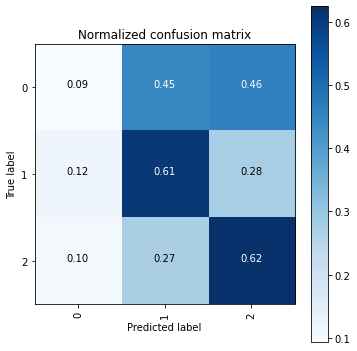

In [23]:
cnf_matrix = confusion_matrix(y_test, predicted_logistic_reg)
np.set_printoptions(precision=2)
classes = np.unique(y)
# Plot normalized confusion matrix
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix, classes=classes, normalize=True, title='Normalized confusion matrix')

plt.show()

## SVM

In [24]:
from sklearn.svm import SVC

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    svm = SVC(kernel = kernel)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        f"For kernel = {kernel}, the accuracy is: {acc}"
    )


For kernel = linear, the accuracy is: 0.49145299145299143
For kernel = poly, the accuracy is: 0.3974358974358974
For kernel = rbf, the accuracy is: 0.5242165242165242
For kernel = sigmoid, the accuracy is: 0.5227920227920227


In [25]:
from sklearn.svm import SVC

svm = SVC(kernel = "rbf")

svm.fit(X_train, y_train)

predicted_svm = svm.predict(X_test)
print("Clasification report")
print(classification_report(y_test, predicted_svm))

Clasification report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       161
           1       0.53      0.71      0.61       277
           2       0.52      0.65      0.57       264

    accuracy                           0.52       702
   macro avg       0.35      0.45      0.39       702
weighted avg       0.40      0.52      0.46       702



Normalized confusion matrix


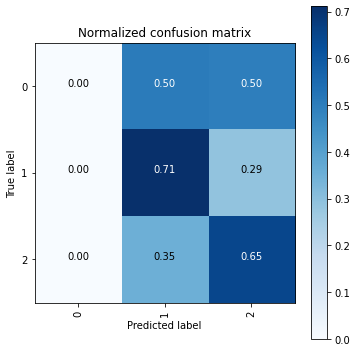

In [26]:
cnf_matrix = confusion_matrix(y_test, predicted_svm)
np.set_printoptions(precision=2)
# Plot normalized confusion matrix
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix, classes=classes, normalize=True, title='Normalized confusion matrix')

plt.show()